In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad
import celltypist
from celltypist import models

import matplotlib.pyplot as plt

In [2]:
sc.settings.set_figure_params(dpi=100, facecolor="white")
plt.rcParams['pdf.fonttype']=3

In [ ]:
sc.logging.print_versions()

In [9]:
adata = sc.read_h5ad('../ProcessedData/seurat/annotated_prepost_csf.h5ad')

In [18]:
ordered_cell_types = cell_type_levels
adata.obs['cell_type'] = adata.obs['cell_type'].cat.reorder_categories(ordered_cell_types)

In [47]:
marker_genes_dict = {
    "B": ["CD79A", "MS4A1", "TNFRSF13C"],
    "CD4+ CAR T": ["CAR"],
    "CD8+ CAR T": ["CAR"],
    "CD4+ T": ["CD3G","CD40LG", "CD4", "MAL"],
    "CD8+ T": ["CD8B", "CD8A", "GZMH"],
    "Cycling CD8+ T": ["MKI67", "TOP2A", "NUSAP1"],
    "MAIT": ["SLC4A10", "NCR3", "KLRB1"],
    "Macrophage": ["TREM2", "APOE", "C1QA", "MS4A4A"],
    "Mixed CAR+/CAR- Tfh": ["TNFRSF4", "PDCD1", "TNFRSF18"],
    "Monocyte": ["VCAN", "FCN1", "S100A8"],
    "NK": ["NCAM1", "XCL1", "NCR1"], 
    "Plasma": ["JCHAIN", "IGKC", "SDC1"],
    "Treg": ["FOXP3", "IKZF2", "IL2RA"],
    "cDC1": ["IDO1", "XCR1", "CLEC9A"],
    "cDC2": ["FCER1A", "CD1C", "CD1E"],
    "mregDC": ["LAMP3", "CCR7", "IL4I1"],
    "pDC": ["LILRA4", "LRRC26", "IL3RA"]
}

marker_list = sum([marker_genes_dict[ct] for ct in ordered_cell_types],[])
 

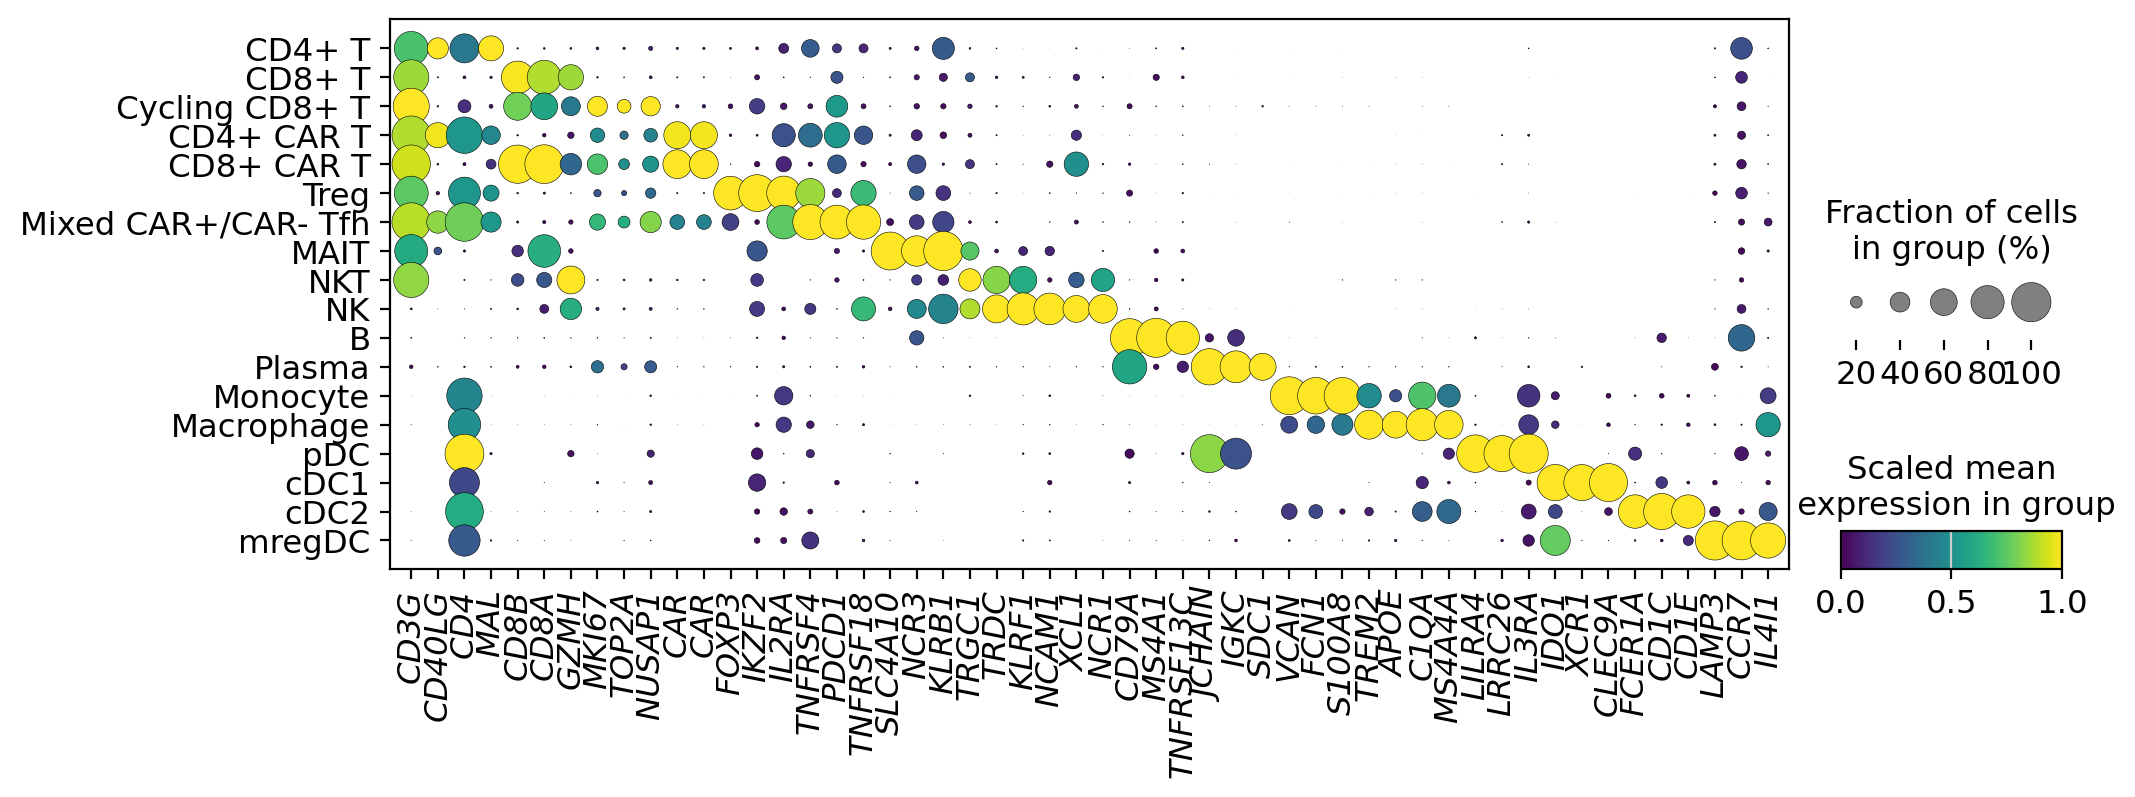

In [48]:
dp = sc.pl.dotplot(
    adata, marker_list, groupby='cell_type_wnk', standard_scale='var', cmap='viridis', dot_max=1, figsize=[11,5.5], 
    show=False, dendrogram=False, colorbar_title='Scaled mean\n expression in group'
)  
plt.subplots_adjust(top=0.8, bottom=0.3, left=0.2)  
ax = dp["mainplot_ax"]
for l in ax.get_xticklabels():
    l.set_style("italic")  
plt.savefig("Final/Figures/1C.pdf", format="pdf", dpi=300)